In [2503]:
# IMPORT THE LIBRARIES AND OPEN THE CSV FILE AS df

In [2504]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from numpy import NaN
from pandas import isnull


df_raw = pd.read_csv ('./data/attacks.csv', encoding='unicode_escape')

# I want to check out the columns that appear in the original dataset (.csv)
df_raw.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [2505]:
'''I remove the columns that I don't want -> ['Investigator or Source', 'pdf', 'href formula', 'href',
'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'] 
-> I additionally remove all lines that have null information or more than 2 fields that are null
'''

df= df_raw.drop(columns=['Injury','Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])
df = df.dropna(how="all")
df = df.dropna(thresh=3)

df.rename(columns = {"Species ":"Species"}, inplace=True)
df.rename(columns = {"Sex ":"Sex"}, inplace=True)
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [2506]:
# I want to check the data types of each item
df.dtypes

Case Number     object
Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Name            object
Sex             object
Age             object
Fatal (Y/N)     object
Time            object
Species         object
dtype: object

In [2507]:
# I start cleaning the Year Column
# Filter - I will keep year > 1900 and will remove data with no Year associated
# I change year dtype to INT

df.drop (df[df.Year < 1900].index, inplace=True)
df = df[df.Year.notna()]
df["Year"] = df["Year"].astype(int)
df.dtypes

Case Number    object
Date           object
Year            int64
Type           object
Country        object
Area           object
Location       object
Activity       object
Name           object
Sex            object
Age            object
Fatal (Y/N)    object
Time           object
Species        object
dtype: object

In [2508]:
# I will clean Countries - I will put everything in CAPITAL LETTERS so to remove duplicates with countries

df["Country"] = df["Country"].str.upper()
df["Country"].unique()


array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [2509]:
# We will clean the Type column - there are 2 blank values and one value that is numeric (val = "34")

df = df[df.Type.notna()]
df.drop (df[df.Type == "34"].index, inplace=True)




In [2510]:
# Date --> next column

#re.search  -> returns True or False

#if starts with Reported -> return the rest of the date
#I will create a new column --> Month (using regex)
#I will create a new column Day --> based on Date column
#I will create a new column Season --> based on new column Month

#(outcome)  --> ["Day"],["Month"],["Year"],["Season"]

from random import randint


df["Date"] = df["Date"].str.replace("Reported ","")

df.insert(2,"Months",df['Case Number'].str.extract('\.(\d{2})\.'))
df.insert(2,"Day",df['Case Number'].str.extract('\.\d{2}\.(\d{2})'))

#as I have the data separated by ["Days"], ["Months"], ["Year"] I will remove the "Date" column

df.drop(["Date"], axis=1 ,inplace=True)

# I want to turn NaN to "00" so that all missing data on date is grouped together -> i will change data type of columns to INT

df.loc[df["Months"].isnull()]="00"
df.loc[df["Day"].isnull()] ="00"



df["Year"] = df["Year"].astype(int)
df["Months"] = df["Months"].astype(int)
df["Day"] = df["Day"].astype(int)

df = df.drop(columns=["Case Number", "Time"])
#I remove columns I will not use: Case Number and Time



In [2511]:
print(df.dtypes)
print(df["Months"].unique())
print(df["Day"].unique())

Day             int64
Months          int64
Year            int64
Type           object
Country        object
Area           object
Location       object
Activity       object
Name           object
Sex            object
Age            object
Fatal (Y/N)    object
Species        object
dtype: object
[ 6  5  4  3  2  1 12 11 10  9  8  7  0]
[25 18  9  8  4  3 27 26 24 21 13  0 12 30 28 23 22 19 15 14 10  5 31 17
 11  1 20 16  6  2 29  7]


In [2512]:
south = pd.read_csv ('./data/south.csv', encoding='unicode_escape')
south.dtypes
# column name --> ï»¿SOUTH COUNTRY 

list_south = []
for elem in south["ï»¿SOUTH COUNTRY"]:
    list_south.append(elem)


#outcome --> list of southern hemisphere countries

#I create column Hemisphere


df["Hemisphere"] = np.where(df['Country'].isin(list_south), 'SOUTH', 'NORTH')



In [2513]:
# I will create the season column (based on the hemisphere and the month)

season_list = []
list_hemis = list(df["Hemisphere"])
list_month = list(df["Months"])

for h,m in zip(list_hemis,list_month):
    if h == "NORTH":
        if m in range(1,4):
            season_list.append("WINTER")
        elif m in range(4,7):
            season_list.append("SPRING")
        elif m in range(7,10):
            season_list.append("SUMMER")
        elif m in range(10,13):
            season_list.append("AUTUMN")
        else: 
            season_list.append("NOT DEFINED")

    elif h == "SOUTH":
        if m in range(1,4):
            season_list.append("SUMMER")
        elif m in range(4,7):
            season_list.append("AUTUMN")
        elif m in range(7,10):
            season_list.append("WINTER")
        elif m in range(10,13):
            season_list.append("SPRING")
        else: 
            season_list.append("NOT DEFINED")

df["Season"] = season_list

#i will change the order of teh columns!

df= df.reindex(columns=['Day', 'Months', 'Year','Season', 'Type', 'Hemisphere','Country', 'Area','Location', 'Activity', 'Name', 'Sex', 'Age', 'Fatal (Y/N)','Species'])
df.head()


,Day,Months,Year,Season,Type,Hemisphere,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species
0,25,6,2018,SPRING,Boating,NORTH,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,N,White shark
1,18,6,2018,SPRING,Unprovoked,NORTH,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,N,NaN
2,9,6,2018,SPRING,Invalid,NORTH,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,N,NaN
3,8,6,2018,AUTUMN,Unprovoked,SOUTH,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,N,2 m shark
4,4,6,2018,SPRING,Provoked,NORTH,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,N,"Tiger shark, 3m"


In [2514]:
df.dtypes

Day             int64
Months          int64
Year            int64
Season         object
Type           object
Hemisphere     object
Country        object
Area           object
Location       object
Activity       object
Name           object
Sex            object
Age            object
Fatal (Y/N)    object
Species        object
dtype: object

In [2515]:
# I clean Sex column

df["Sex"] = df["Sex"].str.extract("(^M|F)")
df["Sex"].unique()

array(['F', 'M', nan], dtype=object)

In [2516]:
# I clean Fatal column
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.extract("(^Y|N)")
df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan], dtype=object)

In [2517]:
# I will proceed with the cleaning of the age
df["Age"] = df["Age"].str.extract("(\d{1,2})")
df["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '00', '63', '70', '53', '77', '74', '5', '86', '84', '75',
       '87', '67', '1', '2', '81', '78'], dtype=object)

In [2518]:
#Let's clean species!!




df["Species"] = df["Species"].str.extract("([A-Z|a-z]{1,}\s{1}shark)")
df["Species"] = df["Species"].str.upper()



In [2519]:
df["Species"].unique()

array(['WHITE SHARK', nan, 'M SHARK', 'TIGER SHARK', 'LEMON SHARK',
       'BULL SHARK', 'REEF SHARK', 'NURSE SHARK', 'WOBBEGONG SHARK',
       'BLACKTIP SHARK', 'A SHARK', 'GALAPAGOS SHARK', 'SMALL SHARK',
       'BLUE SHARK', 'COOKIECUTTER SHARK', 'SPINNER SHARK',
       'WHITETIP SHARK', 'SANDTIGER SHARK', 'NO SHARK', 'GILL SHARK',
       'SEVENGILL SHARK', 'ANGEL SHARK', 'DOGFISH SHARK', 'MAKO SHARK',
       'WHALER SHARK', 'SILKY SHARK', 'JUVENILE SHARK',
       'HAMMERHEAD SHARK', 'BUT SHARK', 'FOOT SHARK', 'RAGGEDTOOTH SHARK',
       'GOBLIN SHARK', 'METRE SHARK', 'SANDBAR SHARK', 'COW SHARK',
       'SALMON SHARK', 'PORBEAGLE SHARK', 'JACKSON SHARK',
       'ZAMBESI SHARK', 'KG SHARK', 'THRESHER SHARK', 'WHALE SHARK',
       'CUTTER SHARK', 'DUSKY SHARK', 'SMOOTHHOUND SHARK',
       'BASKING SHARK', 'AS SHARK', 'SAND SHARK', 'SAME SHARK',
       'COPPER SHARK', 'BROWN SHARK', 'COLORED SHARK', 'CAPTIVE SHARK',
       'BONNETHED SHARK', 'FINNED SHARK', 'SOUPFIN SHARK', 'YOUNG SHA

In [2520]:
# I will clean activities now!!!
new_activity = []
# I will group activities within the following groups ["Diving", "Surfing", "Swimming", "Fishing","Walking", "Sailing","Other"]
df["Activity"]=df["Activity"].str.upper()
activity= df["Activity"]

for word in activity:
    word=str(word)
    if "SURF" in word:
        new_activity.append("Surfing")
    
    elif "SURFING" in word:
        new_activity.append("Surfing")
    
    elif "PADDL" in word:
        new_activity.append("Surfing")

    elif "DIVE" in word:
        new_activity.append("Diving")
    
    elif "DIVING" in word:
        new_activity.append("Diving")

    elif "SWIM" in word:
        new_activity.append("Swimming")
    
    elif "FLOAT" in word:
        new_activity.append("Swimming")
    
    elif "FISH" in word:
        new_activity.append("Fishing")
    
    elif "NETS" in word:
        new_activity.append("Fishing")

    elif "WALK" in word:
        new_activity.append("Walking")

    elif "BOAT" in word:
        new_activity.append("Sailing")

    else:
        new_activity.append("Other")
        

df["Activity"] = new_activity
df["Activity"].unique()


array(['Surfing', 'Other', 'Diving', 'Swimming', 'Fishing', 'Walking',
       'Sailing'], dtype=object)

In [2521]:

###NO M'ELIMINA ELS PUTUS VALORS RAROS!!! -> AL CSV S'EM QUEDEN

df = df.drop (df[df.Type == "00"].index)
df = df.drop (df[df.Day == "F"].index)
df= df.drop (df[df.Months == 0].index)
#df.drop (df[df.Day == "Fishing"].index, inplace=True)
df["Months"].unique()


array([ 6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7])

[Text(0.5, 1.0, 'Evolution of attacks split by Fatality')]

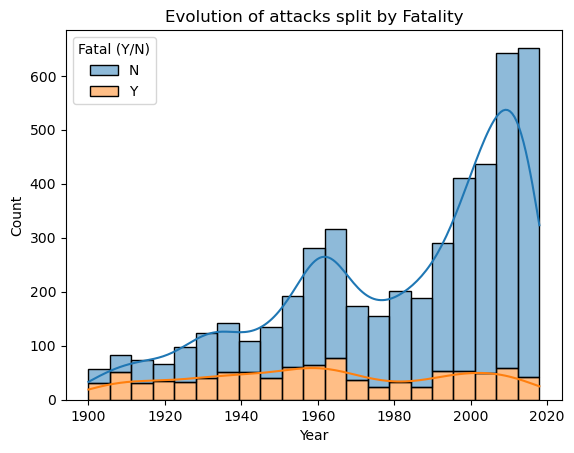

In [2522]:
sns.histplot(df, x="Year", hue="Fatal (Y/N)",multiple="stack",kde=True).set(title='Evolution of attacks split by Fatality')

[Text(0.5, 1.0, 'Evolution of attacks by Activity')]

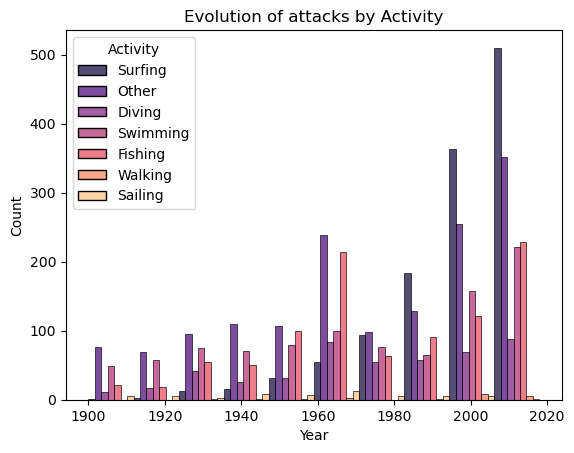

In [2523]:



sns.histplot(df, x="Year", hue="Activity",multiple="dodge", bins= 10, palette="magma").set(title='Evolution of attacks by Activity')

[Text(0.5, 1.0, 'Attacks by Activity filtered by Fatality')]

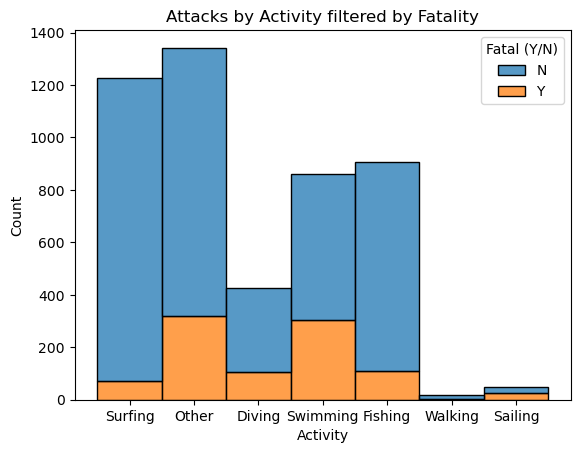

In [2524]:
sns.histplot(df, x="Activity", hue="Fatal (Y/N)",multiple="stack", bins= 10).set(title='Attacks by Activity filtered by Fatality')

AttributeError: 'tuple' object has no attribute 'set'

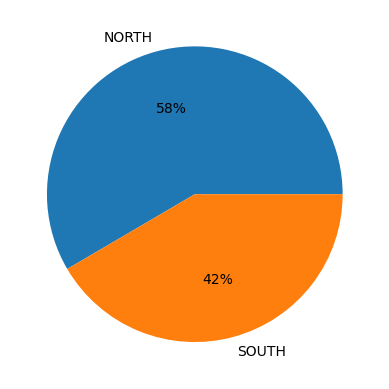

In [2525]:

plt.pie(df["Hemisphere"].value_counts(), labels=["NORTH","SOUTH"],autopct="%1.0f%%").set(title='Reported attacks by Hemisphere')

<AxesSubplot:xlabel='Season', ylabel='Count'>

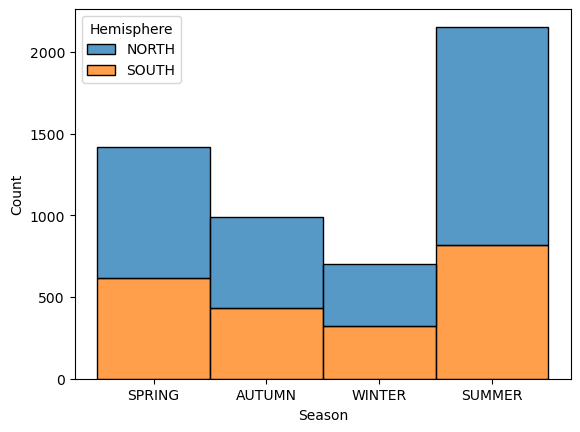

In [ ]:

sns.histplot(df, x="Season", hue="Hemisphere", multiple="stack").set(title='Provoked Attacks each Season by Hemisphere')

<AxesSubplot:xlabel='Season', ylabel='Count'>

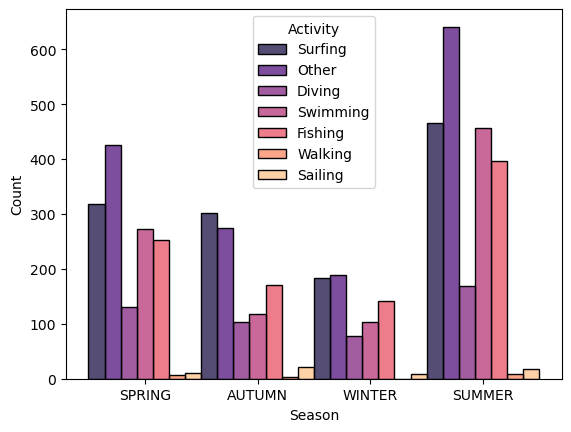

In [ ]:
sns.histplot(df, x="Season", hue="Activity", multiple="dodge", palette= "magma").set(title='Attacks by Season depending on the Activity')

In [ ]:
#Given that the Summer is the season is the main attack season, I want to see where are most surfing attacks during the summer located

df_surfer_summer = df.copy()
df_surfer_summer = df_surfer_summer[df_surfer_summer ["Season"] == "SUMMER"]
df_surfer_summer = df_surfer_summer[df_surfer_summer ["Activity"] == "Surfing"]
df_surfer_summer.head()

,Day,Months,Year,Season,Type,Hemisphere,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species
38,9,3,2018,SUMMER,Unprovoked,SOUTH,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,N,M SHARK
51,12,1,2018,SUMMER,Unprovoked,SOUTH,BRAZIL,Fernando de Noronha,Conceicao Beach,Surfing,Ricardo Ferrari Bulhoes,M,20,N,SMALL SHARK
52,5,1,2018,SUMMER,Unprovoked,SOUTH,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Justin,M,NaN,N,WOBBEGONG SHARK
77,25,9,2017,SUMMER,Unprovoked,NORTH,USA,Florida,"Hanna Park, Jacksonville, Duval County",Surfing,Justin White,M,NaN,N,NaN
79,24,9,2017,SUMMER,Invalid,NORTH,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,NaN,NaN


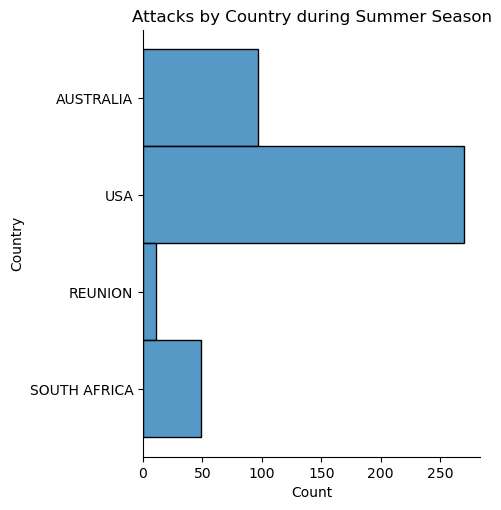

In [ ]:
df_surfer_summer = df_surfer_summer[df_surfer_summer.groupby("Country").Country.transform("count")>10]

sns.displot(df_surfer_summer, y="Country").set(title='Attacks by Country during Summer Season')

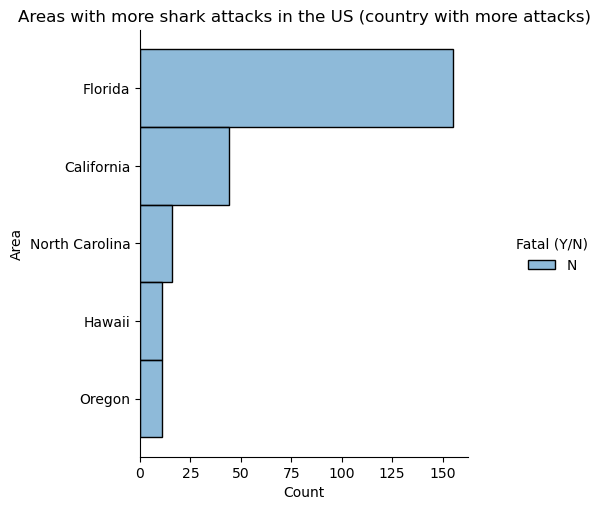

In [ ]:

df_surfer_summer_usa = df_surfer_summer[df_surfer_summer ["Country"] == "USA"]

df_surfer_summer_usa = df_surfer_summer_usa[df_surfer_summer_usa.groupby("Area").Area.transform("count")>10]

sns.displot(df_surfer_summer_usa, y="Area", hue= "Fatal (Y/N)").set(title='Areas with more shark attacks in the USA (country with more attacks)')

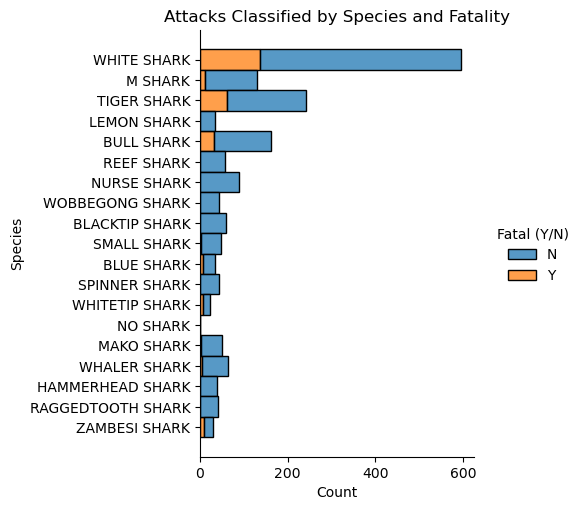

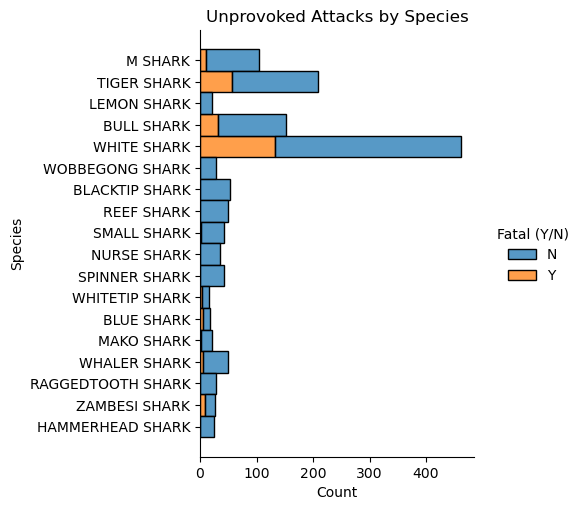

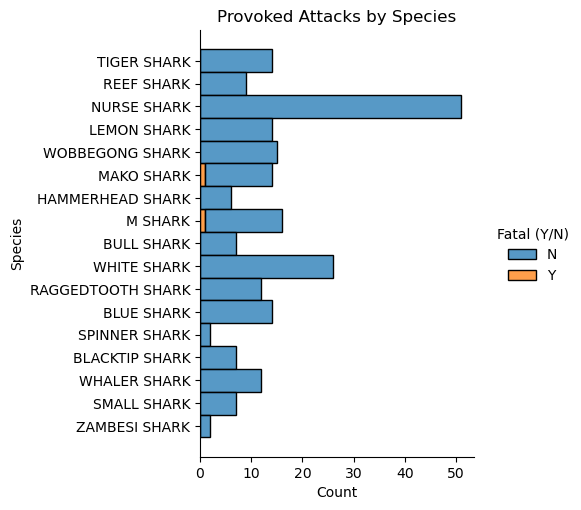

In [ ]:
#Now I will look at the species!!

df_species = df.copy()

df_species = df_species[df_species.groupby("Species").Species.transform("count")>20]

df_species_unprovoked = df_species[df_species["Type"] == "Unprovoked"]
df_species_provoked = df_species[df_species["Type"] == "Provoked"]

sns.displot(df_species, y= df_species['Species'],  hue="Fatal (Y/N)", multiple="stack").set(title='Attacks Classified by Species and Fatality')
sns.displot(df_species_unprovoked, y= df_species_unprovoked['Species'],  hue="Fatal (Y/N)", multiple="stack").set(title='Unprovoked Attacks by Species')
sns.displot(df_species_provoked, y= df_species_provoked['Species'],  hue="Fatal (Y/N)", multiple="stack").set(title='Provoked Attacks by Species')
